In [1]:
!pip install top2vec
!pip install top2vec[sentence_transformers]
!pip install top2vec[sentence_encoders]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 52.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 11.1 MB/s 
     |████████████████████████████████| 24.1 MB 95.0 MB/s 
     |████████████████████████████████| 1.1 MB 50.0 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340267 sha256=00d4d62ef46e53b6e763a0c242e68a2918e7454fbb92b04a9586780c94b1be7e
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=4a4883a72f2d268d700fcc69be97eb2afe2fafb4725fd03dea2bff7c76f7479b
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Cre

In [5]:
from top2vec import Top2Vec
import pandas as pd
df = pd.read_csv("/content/inaug_speeches.csv",engine='python', encoding= 'latin1')
df.head()

,Unnamed: 0,Name,Inaugural Address,Date,text
0,4,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and o...
1,5,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again cal...
2,6,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in ..."
3,7,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CA...
4,8,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to ..."


In [7]:
#clearning the noisyy data 

import re, string 

def clean_text(text):
  text = text.lower
  text = re.sub('\[.*?\]',' ',text) #removing text in square brackets
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\w*\d\w*', ' ',text)
  text = re.sub('�', ' ', text)
  return text

  cleaned_text = lambda x: clean_text(x)

  #cleanSpeech text 
  df["text"] = df["text"].apply(cleaned_text)

In [9]:
df = df[['Name','text']]
df.head()

,Name,text
0,George Washington,Fellow-Citizens of the Senate and o...
1,George Washington,Fellow Citizens: I AM again cal...
2,John Adams,"WHEN it was first perceived, in ..."
3,Thomas Jefferson,Friends and Fellow-Citizens: CA...
4,Thomas Jefferson,"PROCEEDING, fellow-citizens, to ..."


In [11]:
#Training our model 
model = Top2Vec(df.text.values, embedding_model='universal-sentence-encoder')

2022-08-27 11:09:28,347 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-08-27 11:09:28,678 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-08-27 11:09:31,392 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-08-27 11:09:32,041 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-08-27 11:09:34,026 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-08-27 11:09:34,033 - top2v

In [12]:
#lets try to see the number of topics that the model have clustered
model.get_num_topics()

2

In [14]:
model.topic_words
#these are the keywords for each topics

array([['constitutional', 'citizens', 'republic', 'oath', 'countrymen',
        'democracy', 'constitution', 'nation', 'citizen', 'prosperity',
        'against', 'respect', 'civil', 'freedom', 'without', 'equal',
        'honor', 'congress', 'government', 'whose', 'who', 'liberty',
        'powers', 'principles', 'national', 'rights', 'states',
        'ourselves', 'principle', 'necessary', 'nor', 'shall',
        'authority', 'among', 'duty', 'even', 'free', 'executive',
        'administration', 'each', 'between', 'every', 'others', 'under',
        'called', 'president', 'individual', 'both', 'of', 'which'],
       ['prosperity', 'freedom', 'nation', 'countrymen', 'citizens',
        'republic', 'democracy', 'liberty', 'citizen', 'equal', 'oath',
        'peace', 'against', 'without', 'nations', 'ourselves', 'beyond',
        'constitutional', 'free', 'honor', 'constitution', 'respect',
        'who', 'national', 'necessary', 'president', 'strength',
        'individual', 'every', 

In [18]:
topic_words, word_scores, topic_nums = model.get_topics(2)

In [19]:
topic_words

array([['constitutional', 'citizens', 'republic', 'oath', 'countrymen',
        'democracy', 'constitution', 'nation', 'citizen', 'prosperity',
        'against', 'respect', 'civil', 'freedom', 'without', 'equal',
        'honor', 'congress', 'government', 'whose', 'who', 'liberty',
        'powers', 'principles', 'national', 'rights', 'states',
        'ourselves', 'principle', 'necessary', 'nor', 'shall',
        'authority', 'among', 'duty', 'even', 'free', 'executive',
        'administration', 'each', 'between', 'every', 'others', 'under',
        'called', 'president', 'individual', 'both', 'of', 'which'],
       ['prosperity', 'freedom', 'nation', 'countrymen', 'citizens',
        'republic', 'democracy', 'liberty', 'citizen', 'equal', 'oath',
        'peace', 'against', 'without', 'nations', 'ourselves', 'beyond',
        'constitutional', 'free', 'honor', 'constitution', 'respect',
        'who', 'national', 'necessary', 'president', 'strength',
        'individual', 'every', 

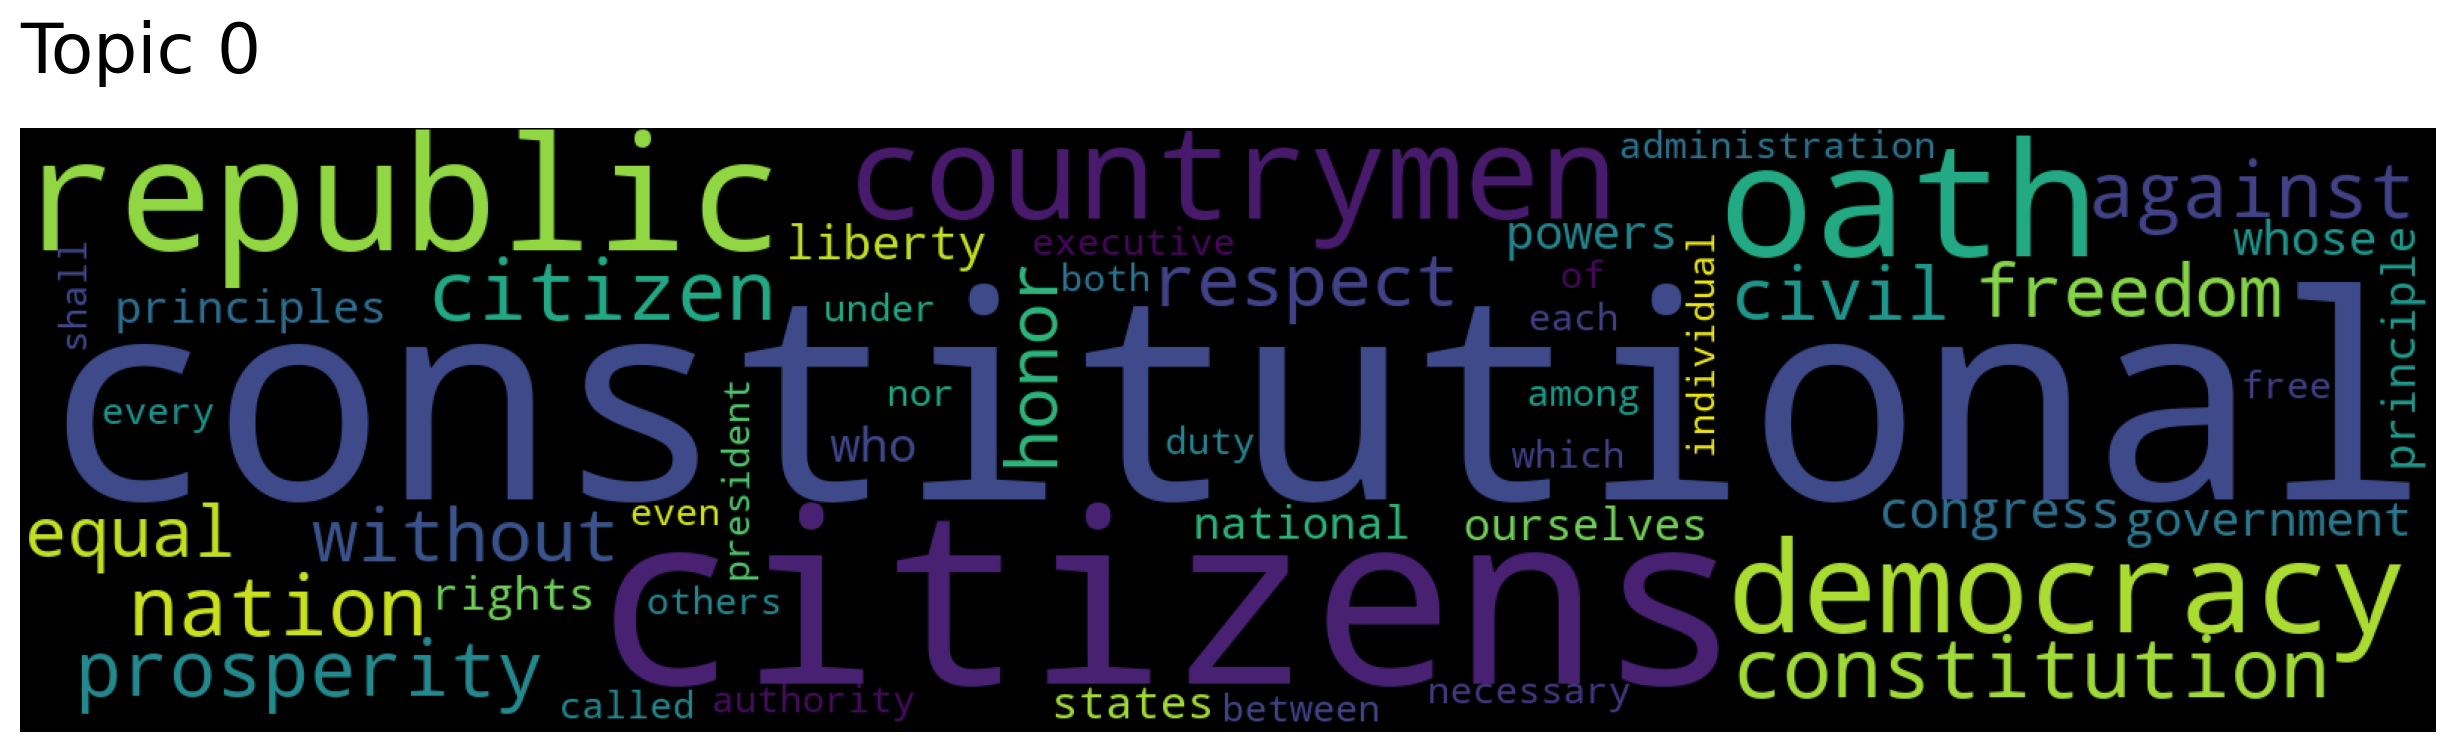

In [20]:
model.generate_topic_wordcloud(0)

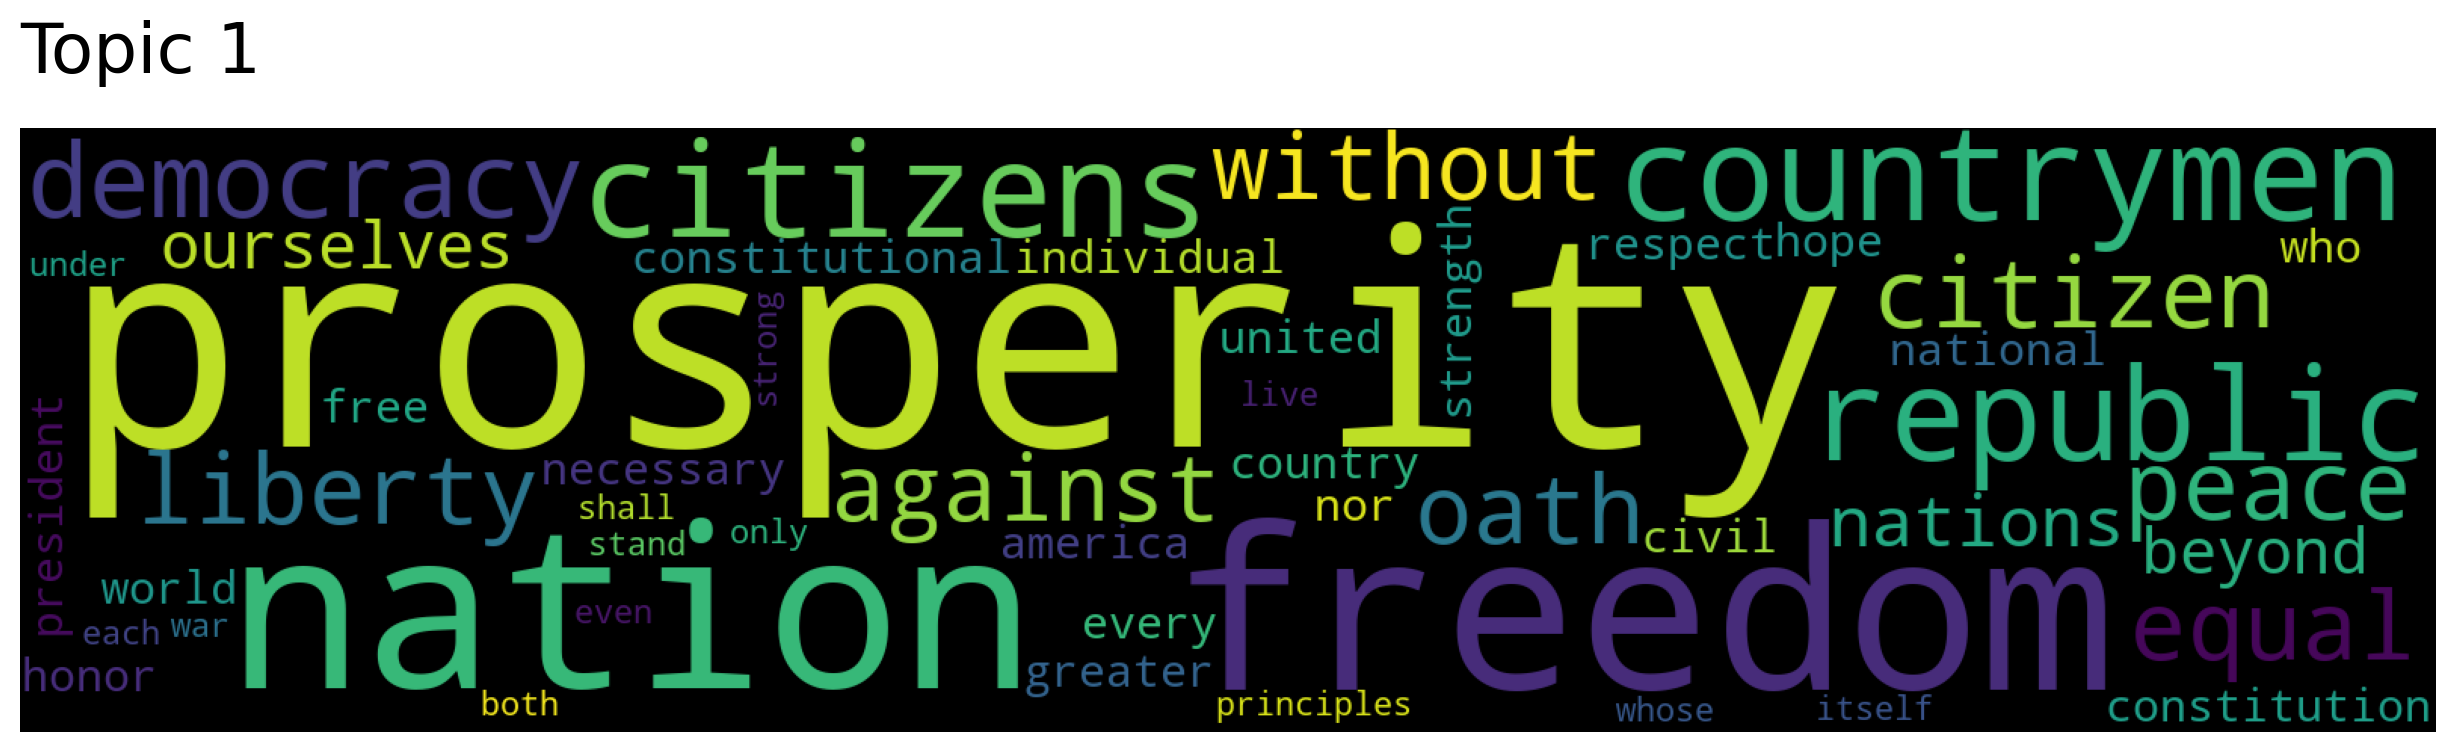

In [21]:
model.generate_topic_wordcloud(1)

In [22]:
# search the Topics by Keywords 
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["citizens"], num_topics=2)
print(f"No of topics : {len(topic_nums)} and words are {topic_words[0]}")

No of topics : 2 and words are ['constitutional' 'citizens' 'republic' 'oath' 'countrymen' 'democracy'
 'constitution' 'nation' 'citizen' 'prosperity' 'against' 'respect'
 'civil' 'freedom' 'without' 'equal' 'honor' 'congress' 'government'
 'whose' 'who' 'liberty' 'powers' 'principles' 'national' 'rights'
 'states' 'ourselves' 'principle' 'necessary' 'nor' 'shall' 'authority'
 'among' 'duty' 'even' 'free' 'executive' 'administration' 'each'
 'between' 'every' 'others' 'under' 'called' 'president' 'individual'
 'both' 'of' 'which']


In [23]:
#lets try to get the first topic 
model.get_topics(1)

(array([['constitutional', 'citizens', 'republic', 'oath', 'countrymen',
         'democracy', 'constitution', 'nation', 'citizen', 'prosperity',
         'against', 'respect', 'civil', 'freedom', 'without', 'equal',
         'honor', 'congress', 'government', 'whose', 'who', 'liberty',
         'powers', 'principles', 'national', 'rights', 'states',
         'ourselves', 'principle', 'necessary', 'nor', 'shall',
         'authority', 'among', 'duty', 'even', 'free', 'executive',
         'administration', 'each', 'between', 'every', 'others', 'under',
         'called', 'president', 'individual', 'both', 'of', 'which']],
       dtype='<U14'),
 array([[0.20241198, 0.19617301, 0.19176745, 0.18309647, 0.16531344,
         0.15305522, 0.14987649, 0.14818645, 0.14450154, 0.12205802,
         0.11791192, 0.11343662, 0.1128088 , 0.10925426, 0.10807002,
         0.10659583, 0.10650786, 0.1062984 , 0.10034452, 0.09859636,
         0.09812029, 0.09713911, 0.09593338, 0.09450091, 0.09163065,
   

In [27]:
#gives the top 20 similarity of the words for the word "Constitutional"

words, word_scores = model.similar_words(keywords=["constitutional"], num_words=20)
for word, score in zip(words, word_scores):
  print (f"{word} {score}")

constitution 0.7288548891777089
citizen 0.4723290988168851
citizens 0.450290174011188
oath 0.43088717256705655
government 0.4204032219741083
law 0.4152112776782078
rights 0.41506158969869855
congress 0.39239696691994663
democracy 0.3910433332140063
laws 0.3744022665957669
american 0.37049017996101846
president 0.3698778366964848
commerce 0.368667863317993
states 0.36404274276619314
state 0.3631170362900829
liberty 0.36074777573782213
foreign 0.3518555621455305
duties 0.3516476355867692
federal 0.35102679377753776
countrymen 0.3505416856767795


In [28]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["government", "citizen"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
  print(f"Document: {doc_id}, Score: {score}")
  print("-----------")
  print(doc)
  print("-----------")
  print()

Document: 1, Score: 0.21117601295815658
-----------
            Fellow Citizens:    I AM again called upon by the voice of my country to execute the functions of its Chief Magistrate. When the occasion proper for it shall arrive, I shall endeavor to express the high sense I entertain of this distinguished honor, and of the confidence which has been reposed in me by the people of united America.      Previous to the execution of any official act of the President the Constitution requires an oath of office. This oath I am now about to take, and in your presence: That if it shall be found during my administration of the Government I have in any instance violated willingly or knowingly the injunctions thereof, I may (besides incurring constitutional punishment) be subject to the upbraidings of all who are now witnesses of the present solemn ceremony.             
-----------

Document: 2, Score: 0.1880128797711507
-----------
              WHEN it was first perceived, in early times, that 

In [29]:
#to get the topic vector for each topics 
model.topic_vectors

array([[-0.03253575, -0.06167646, -0.02800545, ...,  0.04507522,
        -0.04112031,  0.0489663 ],
       [-0.05043258, -0.06308701, -0.02576234, ...,  0.05613748,
        -0.0094052 ,  0.0002949 ]], dtype=float32)

In [31]:
#can also be used to embed the document for any given text 

embedding_vector = model.embed(["I love Data Sciece"])
embedding_vector.shape

TensorShape([1, 512])

In [34]:
# we can also reduce the number of topics as wel 
topic_mapping = model.hierarchical_topic_reduction(num_topics=1)
model.topic_words_reduced[0]

array(['citizens', 'republic', 'countrymen', 'constitutional', 'oath',
       'nation', 'democracy', 'prosperity', 'citizen', 'freedom',
       'constitution', 'against', 'liberty', 'equal', 'without',
       'respect', 'honor', 'civil', 'who', 'ourselves', 'national',
       'whose', 'free', 'principles', 'peace', 'necessary', 'powers',
       'beyond', 'nations', 'nor', 'congress', 'government', 'every',
       'even', 'individual', 'rights', 'shall', 'president', 'states',
       'each', 'under', 'both', 'principle', 'among', 'strength',
       'greater', 'itself', 'between', 'duty', 'executive'], dtype='<U14')